In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("asia_grill_2024_categorized2.xlsx")  

category_columns = [
    'alcohol', 'cold_drink', 'complement', 'dessert', 'grill', 'hot_drink',
    'main_course', 'other', 'salad', 'side_dish', 'soup', 'starter'
]

meta_columns = [
    '#', 'table', 'waiter', 'opened', 'closed', 'guest_count', 'paid', 'profit',
    'morning', 'lunch', 'evening', 'day_of_week', 'weekend'
]


In [ ]:
order_binary_df = df.groupby('#', as_index=False).agg({
    **{col: 'max' for col in category_columns},
    **{col: 'first' for col in meta_columns if col != '#'}
})

order_binary_df = order_binary_df[meta_columns + category_columns]

order_binary_df = order_binary_df[order_binary_df['table'] != '—']

order_binary_df.to_excel("order01_in_cafe_profit.xlsx", index=False)

In [ ]:

order_count_df = df.groupby('#', as_index=False).agg({
    **{col: 'sum' for col in category_columns},
    **{col: 'first' for col in meta_columns if col != '#'}
})

order_count_df = order_count_df[meta_columns + category_columns]

# order_binary_df.to_excel("orders_binary.xlsx", index=False)
# order_count_df.to_excel("orders_counts.xlsx", index=False)


order_count_df = order_count_df[order_count_df['table'] != '—']

order_count_df.to_excel("asia_grill_2024_123.xlsx", index=False)


In [7]:

order_count_df['duration'] = (pd.to_datetime(order_count_df['closed']) - pd.to_datetime(order_count_df['opened'])).dt.total_seconds() / 60

order_count_df['duration'].fillna(order_count_df['duration'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_144\3665167453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_count_df['duration'].fillna(order_count_df['duration'].mean(), inplace=True)


In [8]:
order_count_df.describe()

,#,opened,guest_count,paid,morning,lunch,evening,weekend,alcohol,cold_drink,...,dessert,grill,hot_drink,main_course,other,salad,side_dish,soup,starter,duration
count,4057.000000,4057,4057.000000,4057.000000,4057.00000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,...,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000
mean,7212.489278,2024-07-01 17:14:45.478185728,1.847424,692.899827,0.29332,0.411634,0.295046,0.291102,0.435051,0.546709,...,0.156766,0.162435,0.411388,0.908307,0.186345,0.267193,0.134582,0.428395,0.350505,61.978597
min,3835.000000,2024-01-01 13:45:45,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667
25%,5537.000000,2024-03-31 19:06:57,1.000000,206.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.566667
50%,7235.000000,2024-07-06 13:39:29,2.000000,453.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.433333
75%,8876.000000,2024-09-24 17:25:36,2.000000,827.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,70.666667
max,10645.000000,2024-12-31 17:04:53,25.000000,19823.000000,1.00000,1.000000,1.000000,1.000000,9.000000,6.000000,...,5.000000,3.000000,7.000000,8.000000,4.000000,5.000000,3.000000,4.000000,9.000000,673.050000
std,1928.931840,NaN,1.364396,1018.776702,0.45534,0.492190,0.456119,0.454326,0.822384,0.759781,...,0.443086,0.401536,0.682696,0.983579,0.411593,0.607393,0.390506,0.627966,0.815527,71.836518


In [ ]:
for col in category_columns:
    print(f"Sum of {col}: {order_count_df[col].sum()}")

Sum of alcohol: 1765
Sum of cold_drink: 2218
Sum of complement: 438
Sum of dessert: 636
Sum of grill: 659
Sum of hot_drink: 1669
Sum of main_course: 3685
Sum of other: 756
Sum of salad: 1084
Sum of side_dish: 546
Sum of soup: 1738
Sum of starter: 1422


In [10]:
for col in category_columns:
    print(f"Sum of {col}: {order_binary_df[col].sum()}")

Sum of alcohol: 1183
Sum of cold_drink: 1678
Sum of complement: 388
Sum of dessert: 529
Sum of grill: 610
Sum of hot_drink: 1313
Sum of main_course: 2407
Sum of other: 726
Sum of salad: 817
Sum of side_dish: 479
Sum of soup: 1456
Sum of starter: 966


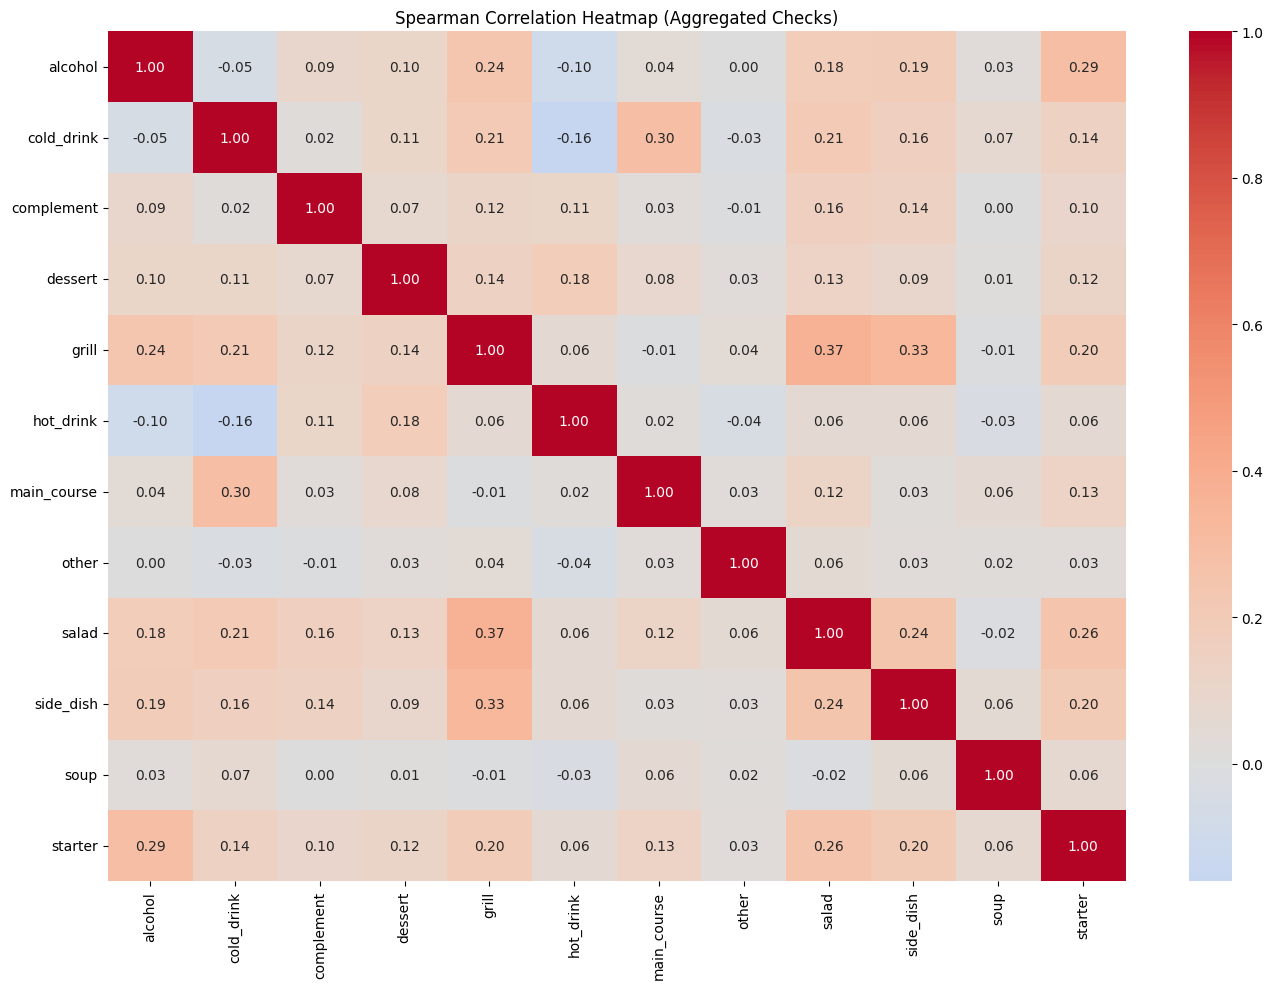

In [11]:
categories = [
    "alcohol", "cold_drink", "complement", "dessert", "grill",
    "hot_drink", "main_course", "other", "salad", "side_dish", "soup", "starter"
]
corr_spearman = order_count_df[categories].corr(method="spearman")


plt.figure(figsize=(14, 10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Spearman Correlation Heatmap (Aggregated Checks)")
plt.tight_layout()
plt.show()

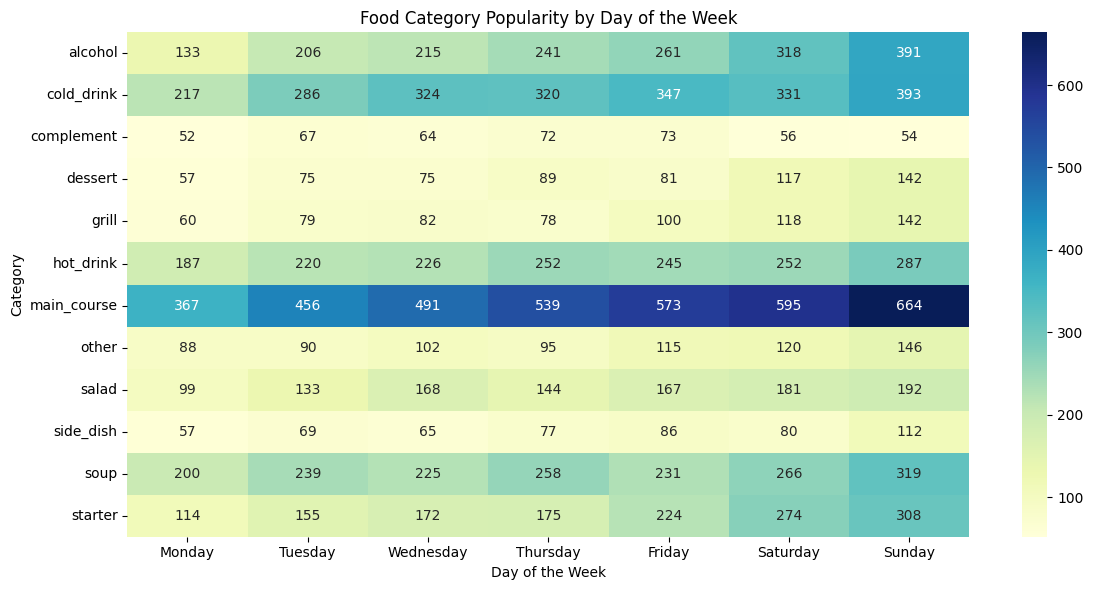

In [ ]:
category_columns = [
    'alcohol', 'cold_drink', 'complement', 'dessert', 'grill', 'hot_drink',
    'main_course', 'other', 'salad', 'side_dish', 'soup', 'starter'
]

day_popularity = order_count_df.groupby('day_of_week')[category_columns].sum()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_popularity = day_popularity.reindex(day_order)

plt.figure(figsize=(12, 6))
sns.heatmap(day_popularity.T, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Food Category Popularity by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


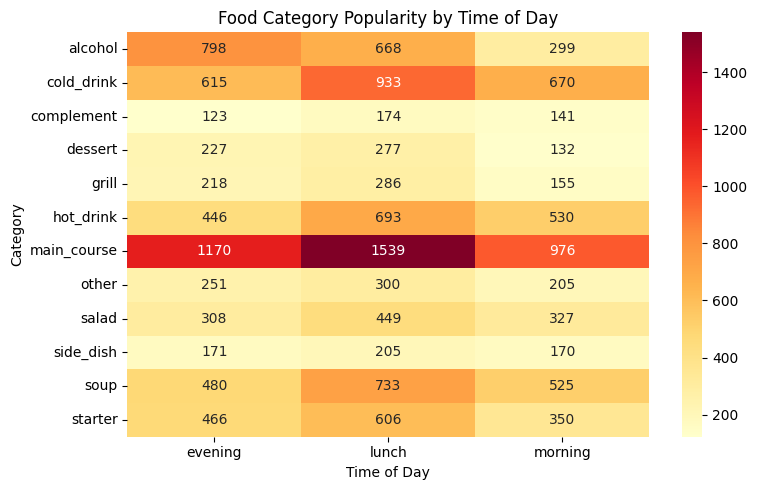

In [ ]:
def get_time_of_day(row):
    if row['morning']: return 'morning'
    elif row['lunch']: return 'lunch'
    elif row['evening']: return 'evening'
    else: return 'unknown'

order_count_df['time_of_day'] = order_count_df.apply(get_time_of_day, axis=1)
time_popularity = order_count_df.groupby('time_of_day')[category_columns].sum()

plt.figure(figsize=(8, 5))
sns.heatmap(time_popularity.T, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Food Category Popularity by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


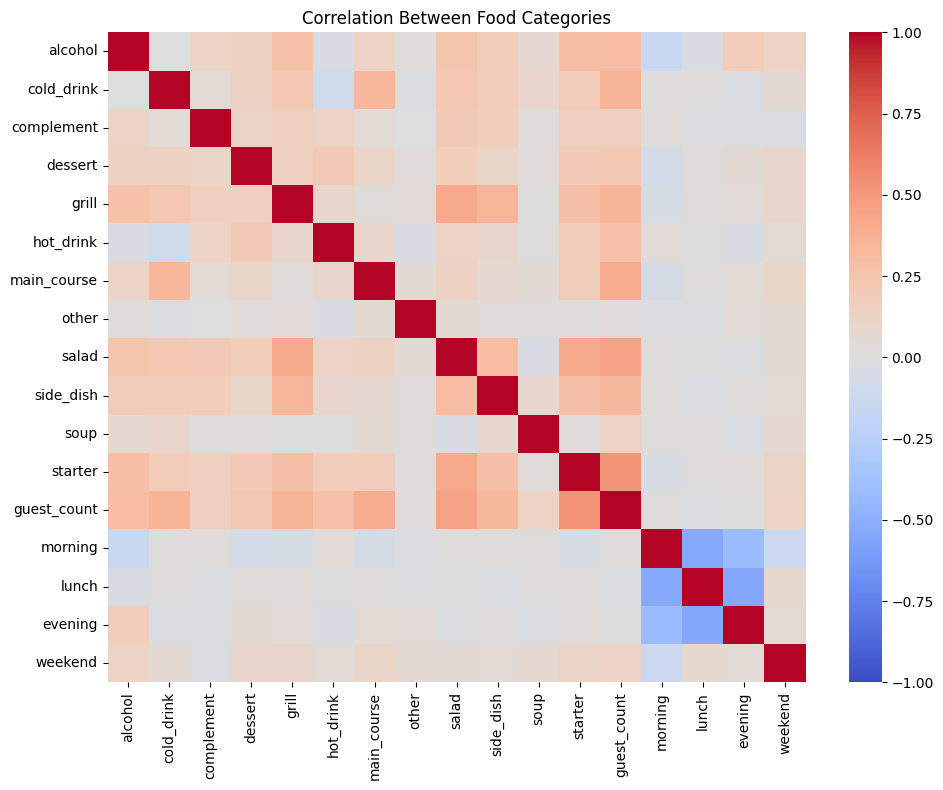

In [ ]:
independent_vars=category_columns+['guest_count',
    'morning', 'lunch', 'evening', 'weekend']
category_corr = order_count_df[independent_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(category_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Food Categories")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

order_count_df["opened"] = pd.to_datetime(order_count_df["opened"])
order_count_df["hour"] = order_count_df["opened"].dt.hour

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
category_columns = [
    'alcohol', 'cold_drink', 'complement', 'dessert', 'grill', 'hot_drink',
    'main_course', 'other', 'salad', 'side_dish', 'soup', 'starter'
]
palette = sns.color_palette("tab20", len(category_columns))


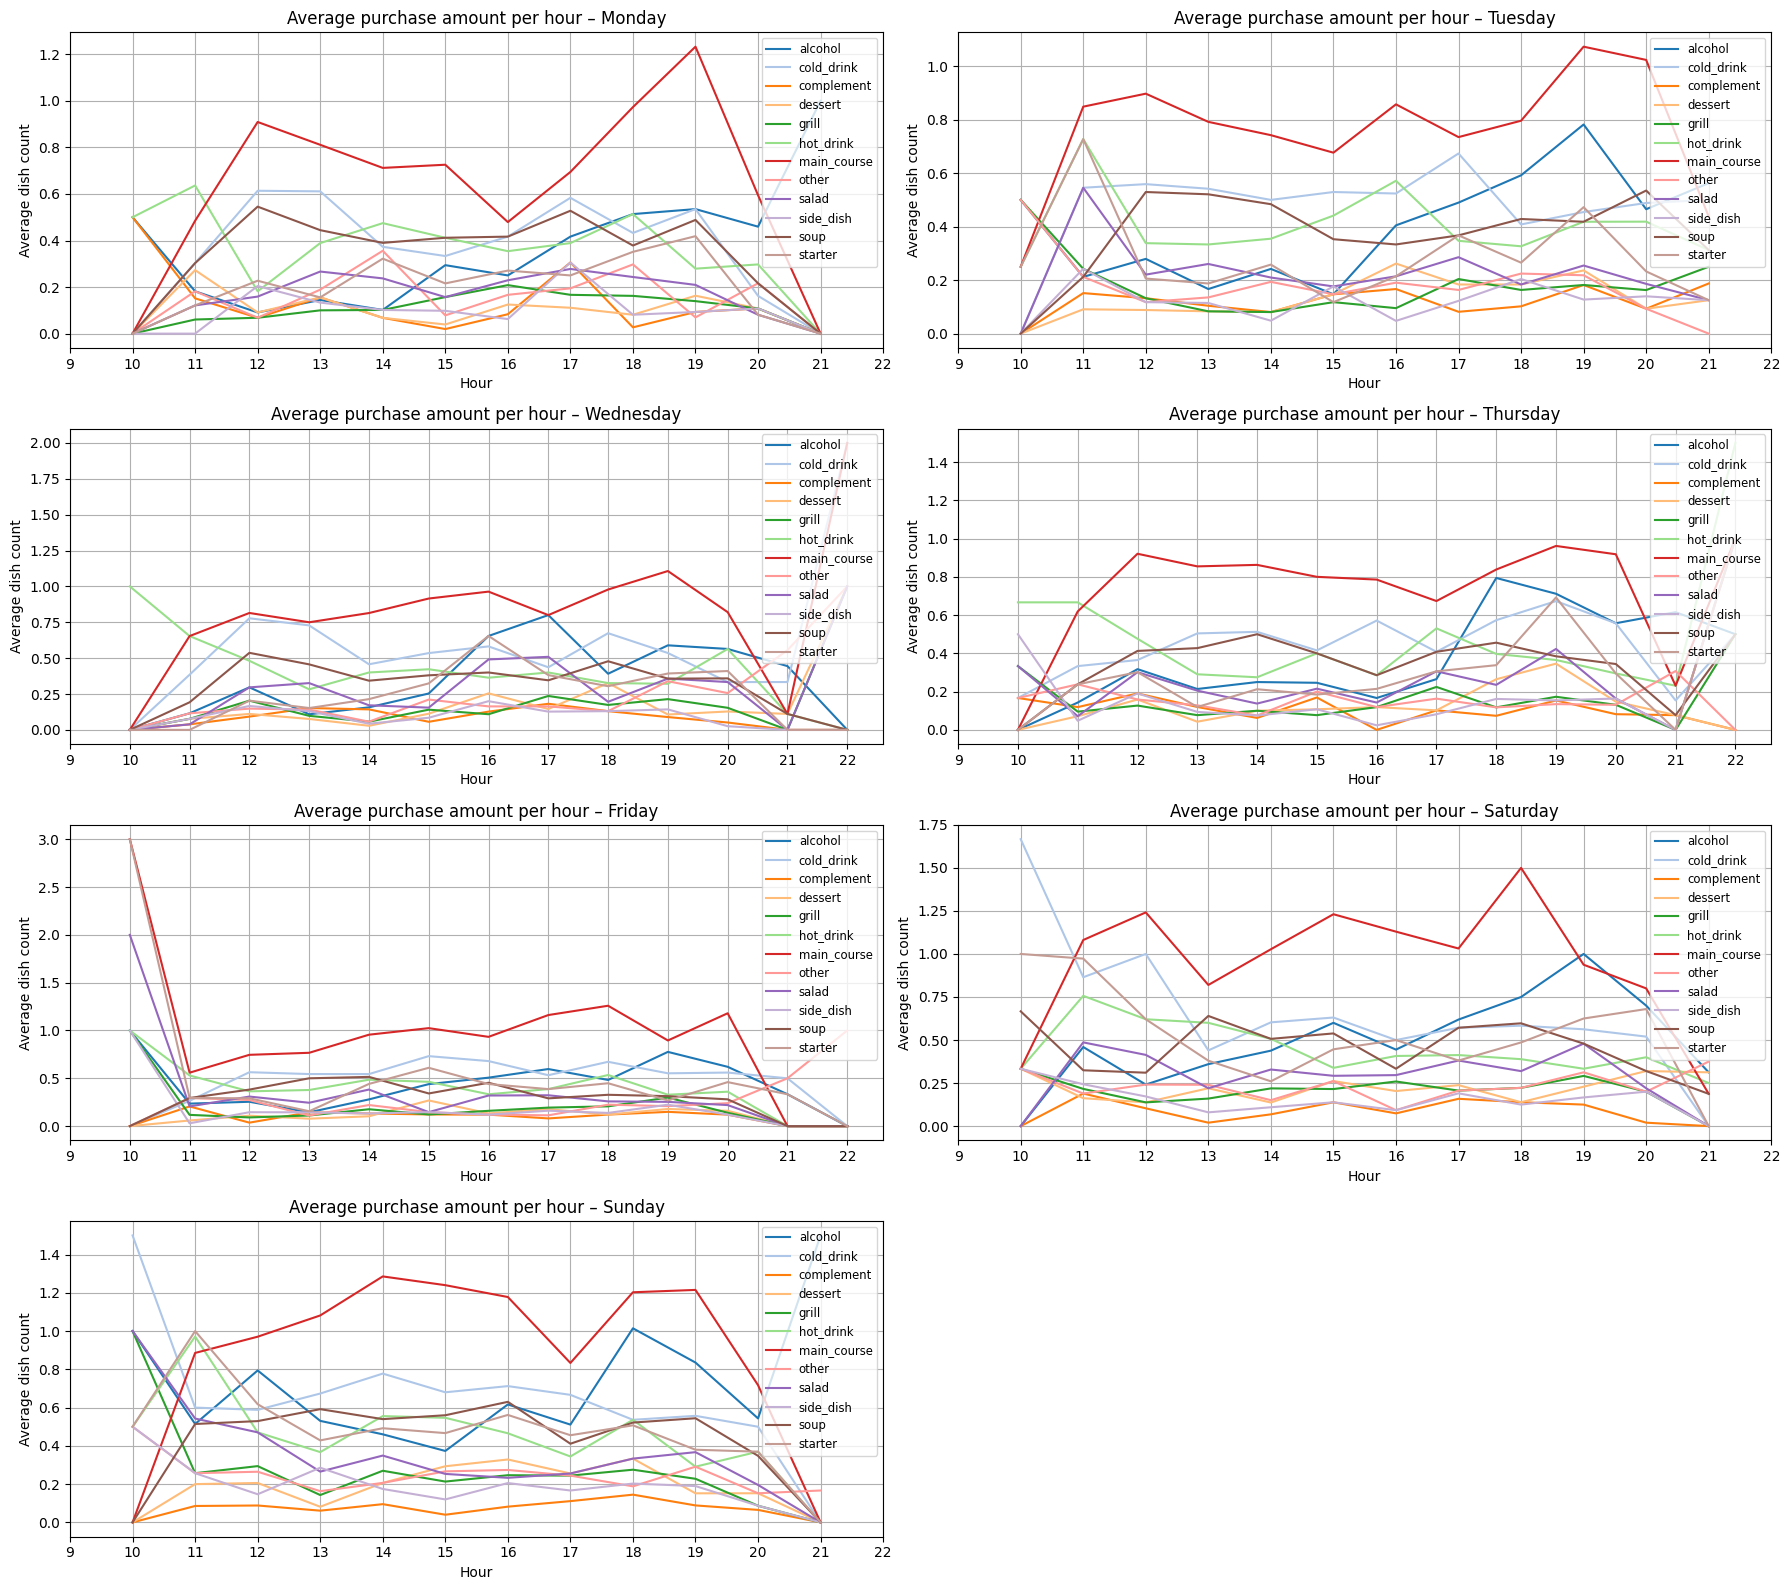

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(18, 16))
axes = axes.flatten()

for i, day in enumerate(days_order):
    day_df = order_count_df[order_count_df["day_of_week"] == day]

    if day_df.empty:
        axes[i].axis('off')
        continue

    hourly_avg = day_df.groupby("hour")[category_columns].mean()

    for j, cat in enumerate(category_columns):
        axes[i].plot(hourly_avg.index, hourly_avg[cat], label=cat, color=palette[j])
    
    axes[i].set_title(f"Average purchase amount per hour – {day}")
    axes[i].set_xlabel("Hour")
    axes[i].set_ylabel("Average dish count")
    axes[i].set_xticks(range(9, 23))
    axes[i].grid(True)
    axes[i].legend(loc="upper right", fontsize='small')

for j in range(len(days_order), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
